In [1]:
#Data Manipulation libraries 
import numpy as np
import pandas as pd

#Data Visualisation libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 

#Applying cool styles 
plt.style.use("ggplot")
rcParams['figure.figsize']=(12, 6)


# from sklearn.model_selection import train_test_split
# from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("datasets/animes.csv")
df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
df.shape

(19311, 12)

In [4]:
df.describe()

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18607.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.568281,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,49.063584,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18607 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [6]:
# Check if there are any useless or redundant variables.
# Are there any duplicate rows.
# Does the nomenclatue makes any sense.
# Are there any new variables we want to create.

In [7]:
# Check if there are any useless or redundant variables.

# We can remove img_url & link columns. 

del df['img_url']
del df['link']

#df.drop(['img_url','link'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18607 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [8]:
# Are there any duplicate rows.
df.drop_duplicates(subset='uid')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18607 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


(19311, 10)

In [9]:
# Does the nomenclatue makes any sense.

df.rename(columns={"uid": "Anime_ID"}, inplace=True)
df.rename(columns={"ranked": "Rank"}, inplace=True)
df.rename(columns={"score": "Rating"}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_ID    19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18607 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   Rank        16099 non-null  float64
 9   Rating      18732 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [12]:
#filling null values in episodes column with mean value
episodes = df["episodes"].values
df["episodes"] = df["episodes"].fillna(np.mean(df["episodes"]))

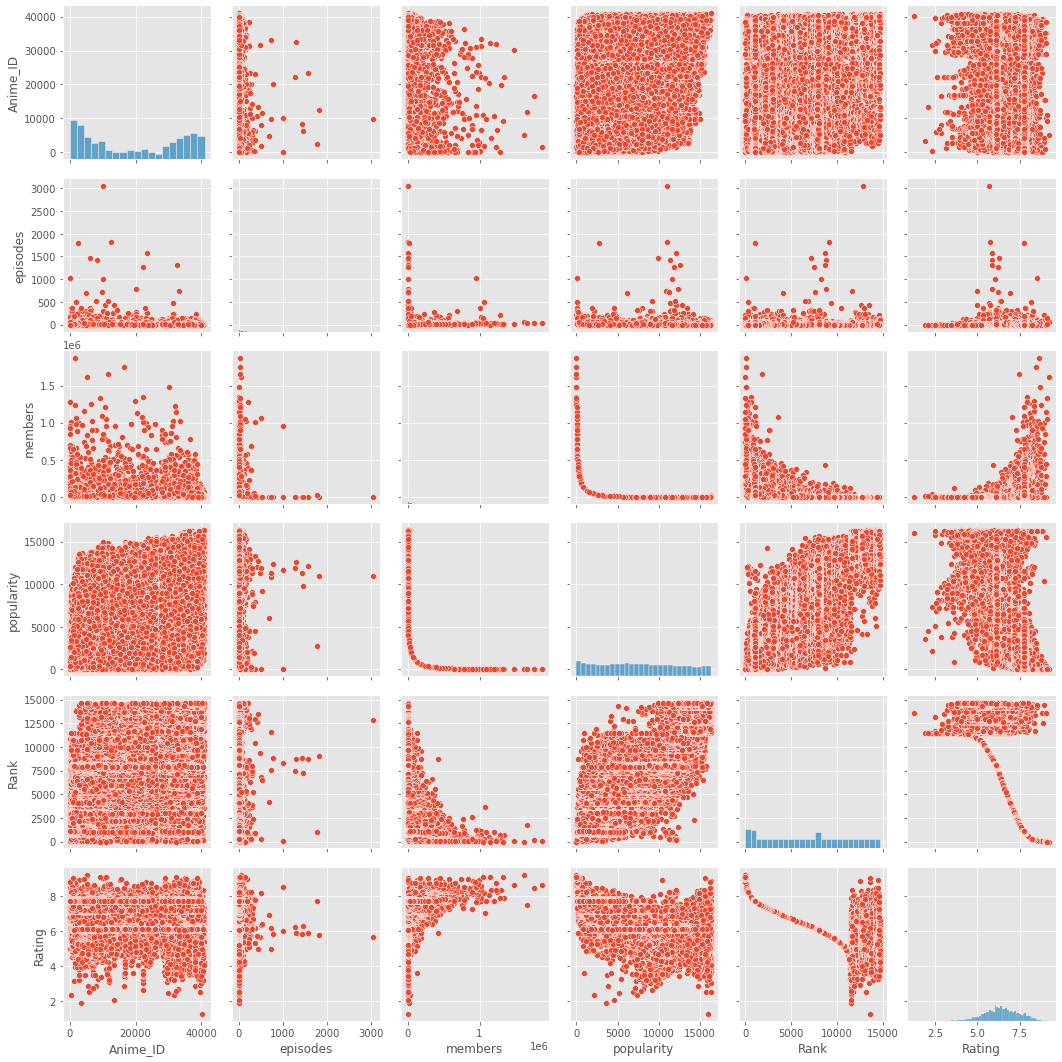

In [11]:
#plots every pair integer columns.
sns.pairplot(df)

In [13]:
coremat=df.corr()

In [14]:
coremat

,Anime_ID,episodes,members,popularity,Rank,Rating
Anime_ID,1.000000,-0.073779,-0.065095,0.342304,0.368896,-0.200402
episodes,-0.073779,1.000000,0.089431,-0.037379,-0.059272,0.075182
members,-0.065095,0.089431,1.000000,-0.448320,-0.408786,0.426010
popularity,0.342304,-0.037379,-0.448320,1.000000,0.854241,-0.694138
Rank,0.368896,-0.059272,-0.408786,0.854241,1.000000,-0.834105
Rating,-0.200402,0.075182,0.426010,-0.694138,-0.834105,1.000000


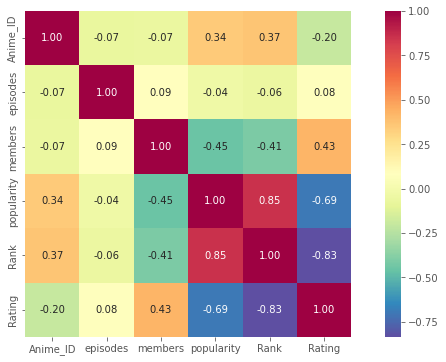

In [15]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=coremat.columns, 
                 xticklabels=coremat.columns, 
                 cmap="Spectral_r")
plt.show()

In [16]:
df.isnull().sum()

Anime_ID         0
title            0
synopsis       975
genre            0
aired            0
episodes         0
members          0
popularity       0
Rank          3212
Rating         579
dtype: int64

## Anime Recommender

### KNN Implementation using Euclidean Distance

In [17]:
def custom_KNN(metrics, data):
    
    e_distances    = []
    length           = len(data.Anime_ID)
    
    

    genre            = data["genre"].values
    in_genres      = len(metrics[0])
    
    anime_ids             = data["Anime_ID"].values
    titles           = data["title"].values
    
    popularities       = data["popularity"].values
    episodes         = data["episodes"].values
    ranks             = data["Rank"].values
    
    for i in range(length):
        genre_cnt  = 0
        temp_popularity         = 0
        temp_episodes         = 0
        temp_rank      = 1
        e_distance  = 0
        
        #checking metric genere
        for j in metrics[0]:
            if j in genre[i]:
                genre_cnt = genre_cnt + 1
        
        #checking metric popularities(if popularities is below metioned treating it as 1 else treating it as 0)
        if popularities[i] < metrics[1]:
            temp_popularity = 1
        
        #checking metric episodes(checking distance from given number of episodes to number of episodes of that anime)
        temp_episodes = episodes[i]
        
        #checing metric rank(if the anime ranks below the mentioned rank, then it is treated as 0 or else it is 1)
        if ranks[i] < metrics[3]:
            temp_rank = 0
            
        e_distance =  (((in_genres-genre_cnt)**2) + ((temp_popularity)**2) + ((metrics[2]-temp_episodes)**2) + ((temp_rank)**2))**0.5
        e_distances.append([i,anime_ids[i],titles[i],e_distance])
            
    return e_distances

In [18]:
def KNN(l_metrics, df, k = 10):
    
    l_e_distances = custom_KNN(l_metrics, df)
    
    l_e_distances.sort(key=lambda row: (row[3]))
    
    #print(l_e_distances)
    
    for i in range(k):
        print(l_e_distances[i][2], ' : ', l_e_distances[i][3])

In [19]:
#input metrics Genre, pop(above that number is liked), Episodes(episodes approx to that number), rank(below that num is liked)
input_metrics = [["Adventure", "Romance"],34,700,100]
#input_metrics = [["Action", "Adventure", "Shounen"],34,800,100]
KNN(input_metrics, df, 7)

Ninja Hattori-kun  :  6.4031242374328485
Shima Shima Tora no Shimajirou  :  26.038433132583073
Asa Da yo! Kaishain  :  44.05678154382138
Kotowaza House  :  73.03423854604085
Perman (1983)  :  174.01436722293937
Obake no Q-tarou (1985)  :  190.01315743916263
Naruto: Shippuuden  :  200.00749985938026


## Anime Classifier

### Clustering

In [21]:
beginner = []
pro = []
advanced = []
l_distances = []

for i in episodes:
    if i <= 100:
        l_distances.append(((((100-0)/2)-i)**2)**0.5) 
        # 50 as centroid for anime with eps lessthan 100
    elif i <= 500:
        l_distances.append(((((500-0)/2)-i)**2)**0.5) 
        # 250 as centroid for anime with eps lessthan 100
    else:
        l_distances.append(((((3057-0)/2)-i)**2)**0.5)
        # 3057(max eps for an anime)//2 as centroid for rest

In [22]:
#Adding new column distances, which caluclates the distance from centroids
df["Distance"] = l_distances
df[['Distance']] = df[['Distance']].apply(pd.to_numeric) 
df["Distance"] = df["Distance"].fillna(np.mean(df["Distance"]))

In [23]:
df.head(3)

,Anime_ID,title,synopsis,genre,aired,episodes,members,popularity,Rank,Rating,Distance
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,25.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,28.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,37.0


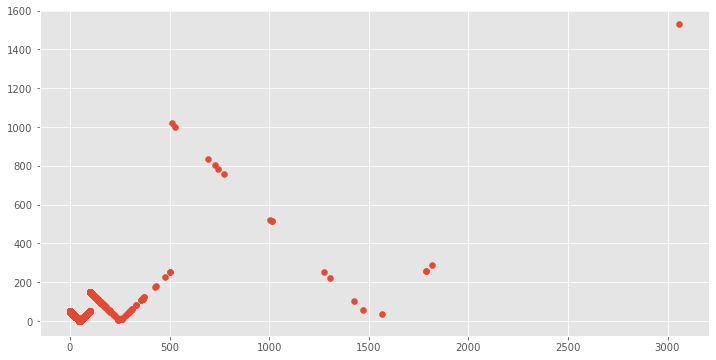

In [24]:
plt.scatter(df['episodes'],df['Distance'])

In [25]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted = km.fit_predict(df[["episodes",'Distance']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [27]:
df["cluster"] = y_predicted
df.head(3)

,Anime_ID,title,synopsis,genre,aired,episodes,members,popularity,Rank,Rating,Distance,cluster
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,25.0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,28.0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,37.0,0


In [28]:
km.cluster_centers_

array([[   8.63264174,   42.16106736],
       [1341.625     ,  483.3125    ],
       [ 174.65258216,  113.6056338 ]])

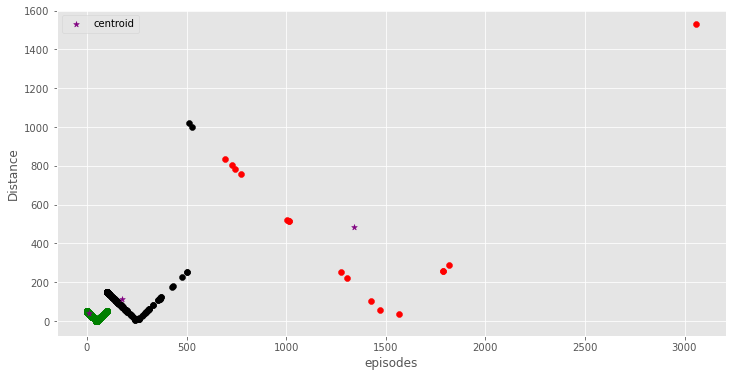

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.episodes,df1['Distance'],color='green')
plt.scatter(df2.episodes,df2['Distance'],color='red')
plt.scatter(df3.episodes,df3['Distance'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('episodes')
plt.ylabel('Distance')
plt.legend()